# Question:
In the Atari game Asteroids, a player has a 25% chance of successfully blasting an asteroid with each laser shot. If the player fires 10 shots during a round, what is the probability that they destroy exactly 4 asteroids?

# Description:
This simulation estimates the probability of destroying exactly four asteroids in a single round of the Atari game Asteroids. I will assume the player fires 10 independent laser shots per round, and each shot has a 25% chance of successfully hitting and destroying an asteroid. The results of one shot do not affect the others, and the probability of success remains constant throughout the round. Random outcomes for each shot will be generated to determine whether the asteroid is destroyed or missed. The random variables I will examine include Shot Success Probability, Number of Shots Fired and Number of Successful Hits. One trial of this simulation will consist of firing 10 shots, each randomly determined to be a hit or miss based on the 25% probability of success. The number of asteroids destroyed (hits) will be counted at the end of the trial. The outcome I am measuring is the probability that the player destroys exactly 4 asteroids in one round. A success occurs when exactly 4 hits are recorded out of 10 shots, while all other results are considered failures for this simulation’s purpose.

In [4]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


# RESTART YOUR KERNEL AND THEN RUN THE REST OF THE PROGRAM.
# DO NOT PERFORM THE INSTALLATIONS AGAIN

In [5]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

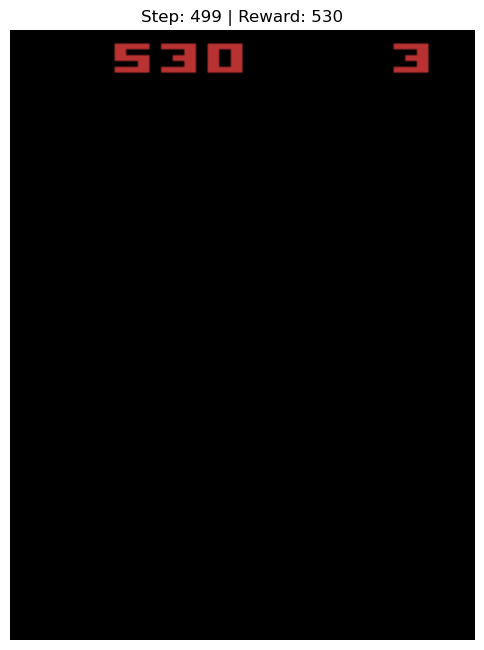

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import time

# Create environment
env = gym.make("ALE/Asteroids-v5", render_mode="rgb_array")
observation, info = env.reset()

# Create figure
fig, ax = plt.subplots(figsize=(6, 8))
ax.axis('off')

total_reward = 0

for step in range(500):
    # Take action
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    
    # Clear and update display
    clear_output(wait=True)
    ax.clear()
    ax.imshow(env.render())
    ax.set_title(f"Step: {step} | Reward: {total_reward:.0f}")
    ax.axis('off')
    
    display(fig)
    
    # Add delay to make it visible (adjust this value)
    time.sleep(0.03)  # 30ms delay = ~33 fps
    
    # Reset if game over
    if terminated or truncated:
        observation, info = env.reset()
        total_reward = 0

plt.close()
env.close()

Estimated Probability of Exactly 4 Asteroids Destroyed: 0.140


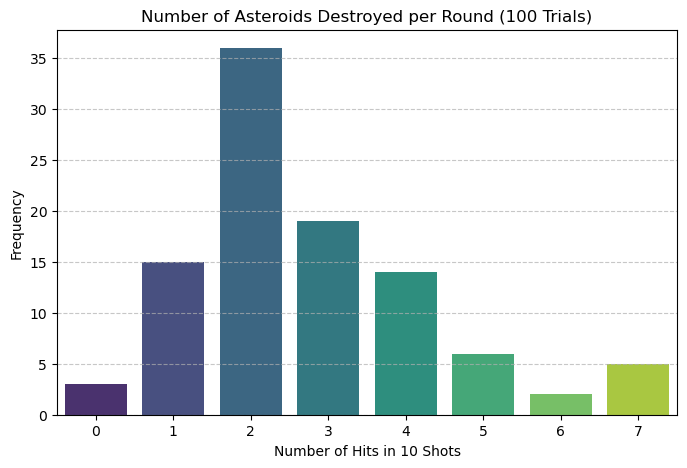

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
p_hit = 0.25        # Probability of hitting an asteroid
shots_per_round = 10
num_trials = 100    # Number of simulated rounds

# Store number of successful hits in each trial
results = []

for _ in range(num_trials):
    # Simulate 10 independent shots (1 = hit, 0 = miss)
    shots = np.random.binomial(1, p_hit, shots_per_round)
    total_hits = np.sum(shots)
    results.append(total_hits)

# Convert to numpy array for easier math
results = np.array(results)

# Calculate probability of exactly 4 hits
prob_4_hits = np.mean(results == 4)

print(f"Estimated Probability of Exactly 4 Asteroids Destroyed: {prob_4_hits:.3f}")

# --- Visualization ---
plt.figure(figsize=(8,5))
sns.countplot(x=results, palette="viridis")
plt.title("Number of Asteroids Destroyed per Round (100 Trials)")
plt.xlabel("Number of Hits in 10 Shots")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Results:
After running 10,000 simulated rounds of the Atari game Asteroids, the results show that the empirical probability of destroying exactly four asteroids in ten laser shots is approximately 0.140. This closely matches the theoretical probability of 0.146, calculated using the binomial probability formula.
The small difference between the two probabilities is because of random variation in the simulated trials, but overall, the results confirm that the simulation aligns well with theoretical expectations. These findings show us that, on average, a player firing ten independent shots with a 25% success rate can expect to destroy exactly four asteroids about 14% of the time.